# An example using Feature weighted ECM clustering
## With Seeds dataset  


In [1]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from evclust.datasets import load_seeds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Seeds DS: 210 instances, 7 features


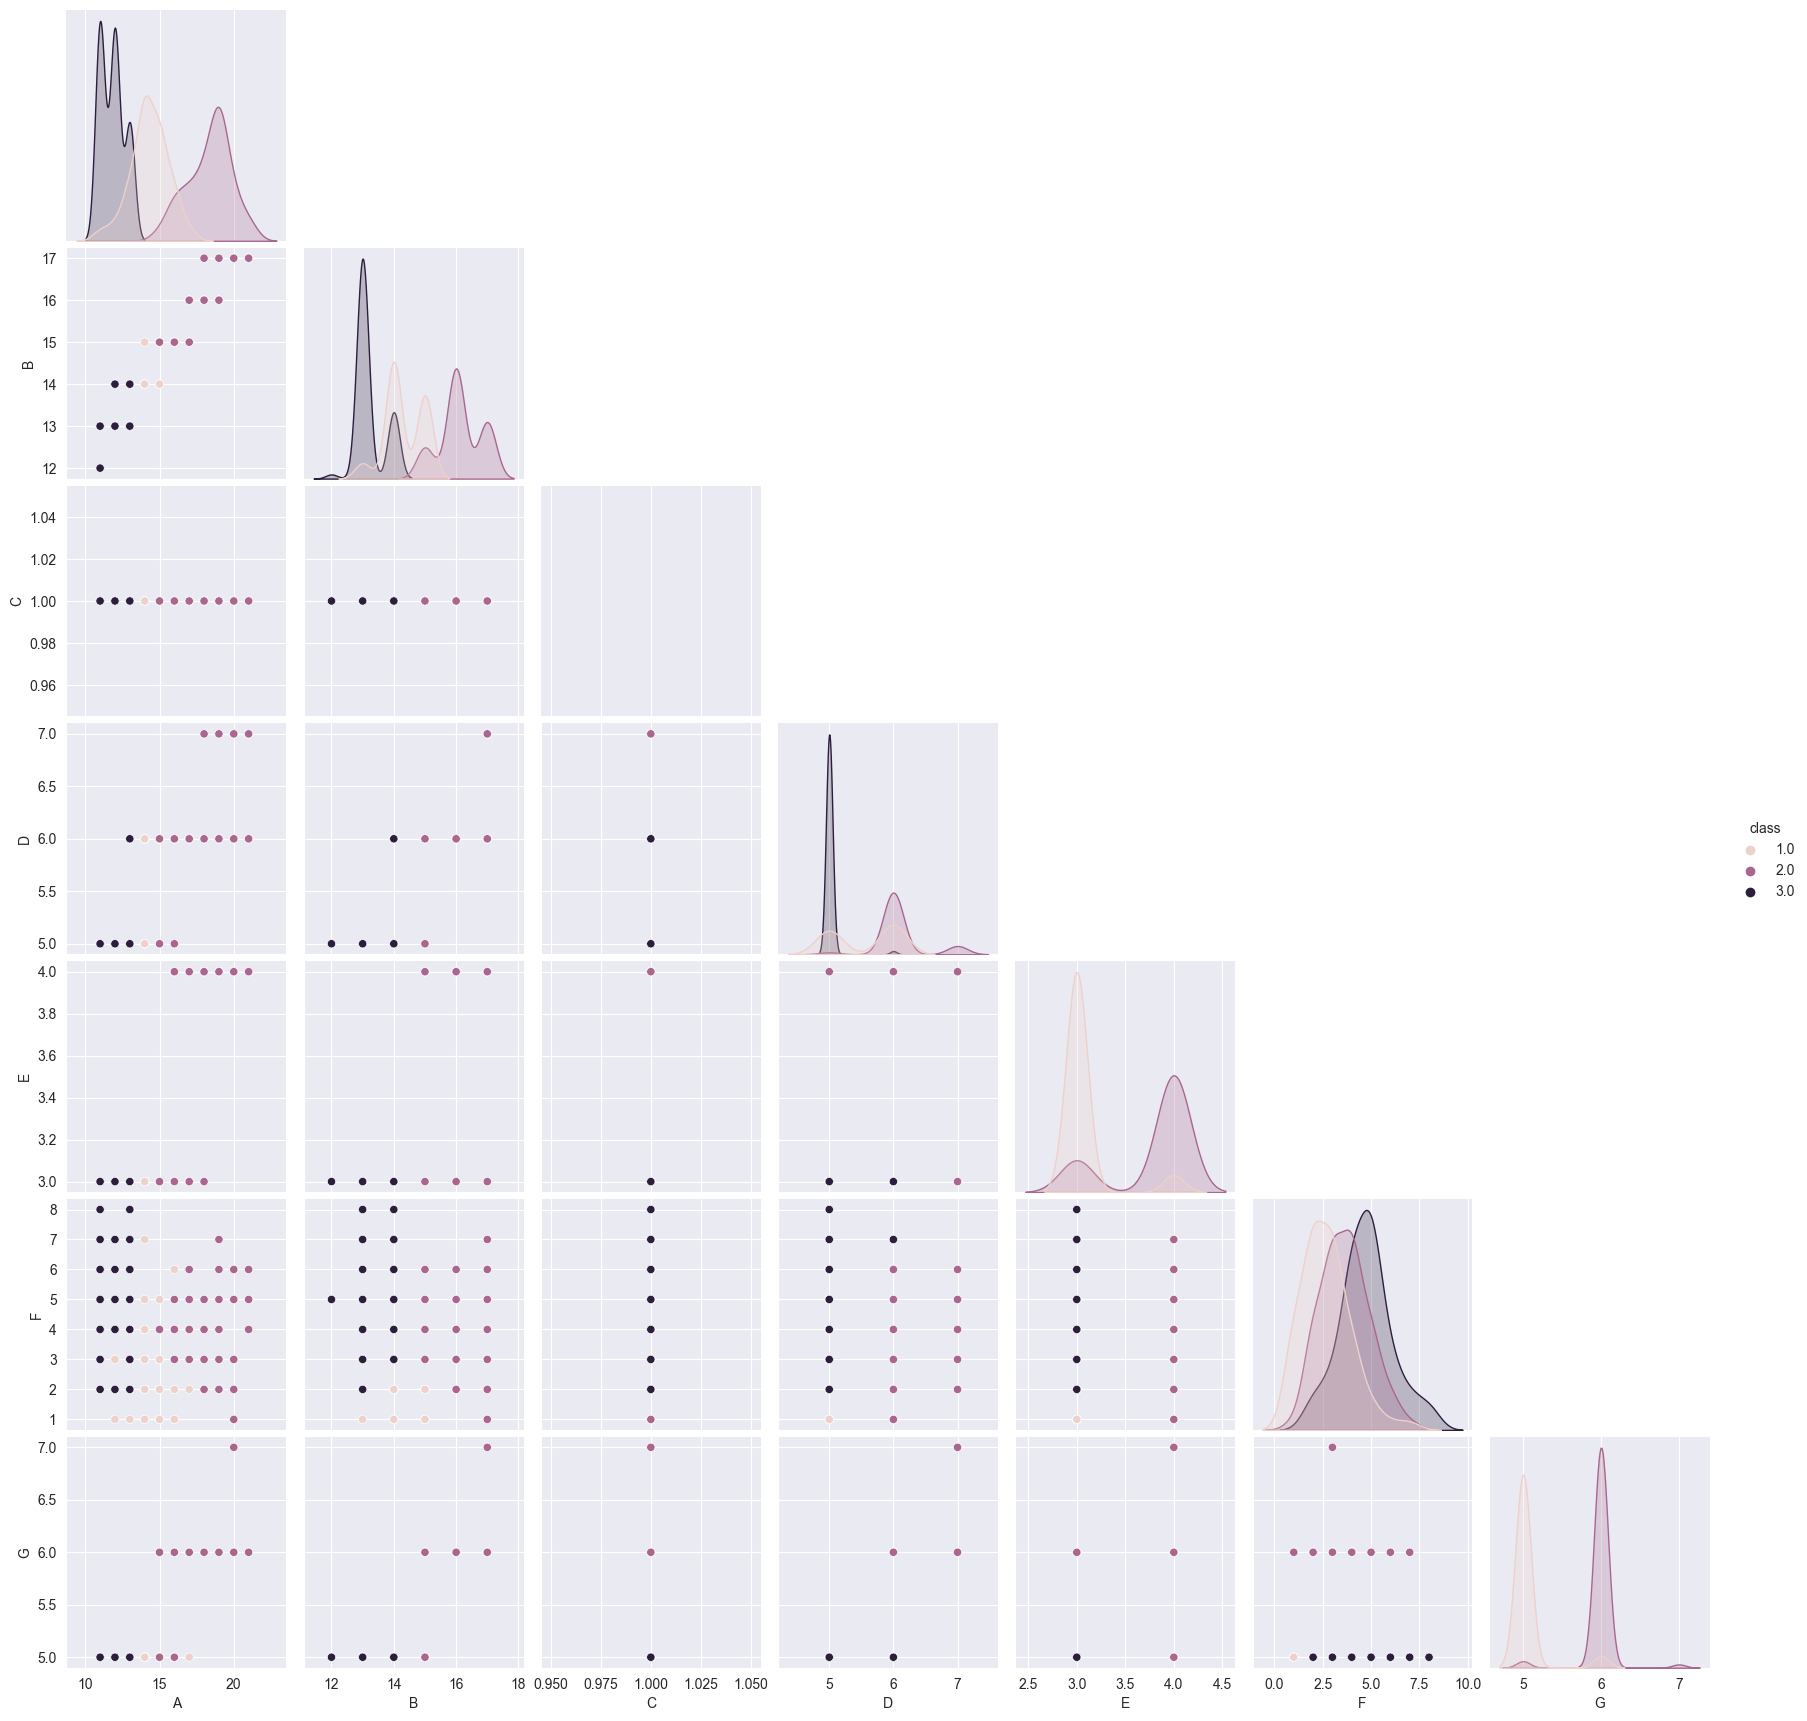

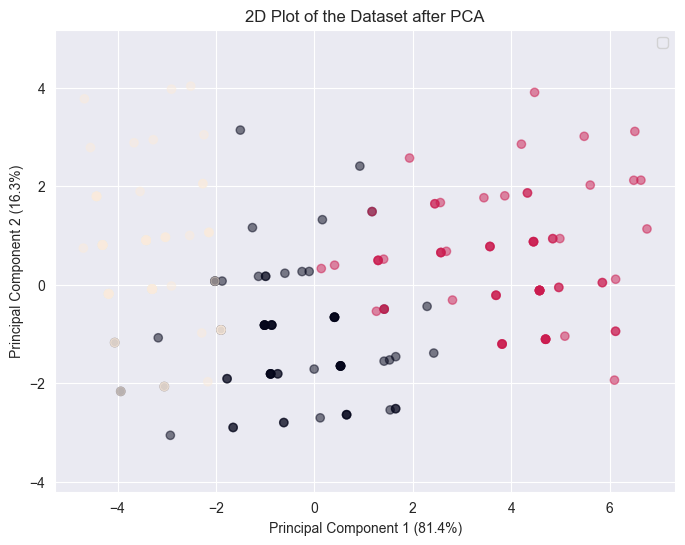

In [2]:
# fetch dataset
df = load_seeds()

# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])

# Scatter matrix plot
sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

print(f"Seeds DS: {X.shape[0]} instances, {X.shape[1]} features")
# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [3]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 288.7625423323275]
[2, 280.80404325434995]
[3, 279.67865784923646]
[4, 279.3696677223972]
[5, 279.23173329600223]
[6, 279.14874575915]
[7, 279.0901449093685]
[8, 279.0457800540676]
[9, 279.0114156736233]
[10, 278.9847244925122]
[11, 278.9640943387224]
[12, 278.9482644940826]
[13, 278.9362095311494]
[14, 278.92709378551115]
[15, 278.9202437677518]
[16, 278.9151243721044]
[17, 278.9113162813212]
[18, 278.9084949270739]
[19, 278.9064117181058]
[20, 278.90487794617286]
[21, 278.90375142992036]
[22, 278.90292571330235]
[  0.         278.90292571 278.90292571]
[1, 288.7625423323275]
[2, 280.8040432543499]
[3, 279.6786578492365]
[4, 279.36966772239714]
[5, 279.23173329600223]
[6, 279.14874575915]
[7, 279.0901449093686]
[8, 279.0457800540676]
[9, 279.01141567362333]
[10, 278.9847244925122]
[11, 278.9640943387224]
[12, 278.94826449408265]
[13, 278.9362095311495]
[14, 278.9270937855111]
[15, 278.92024376775174]
[16, 278.91512437210434]
[17, 278.9113162813212]
[18, 278.90849492707395]
[19, 27

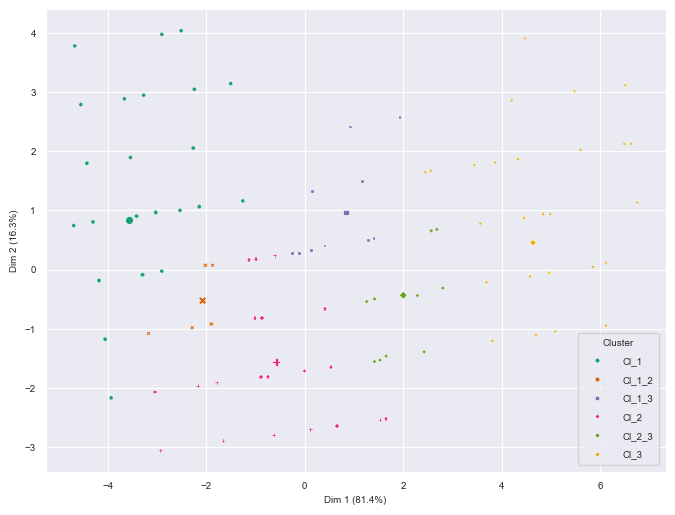

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.6828553072911945
Maximum Non-specificity value: 3.658856090005623
Minimum Non-specificity value: 0.07456846034697379
Average Non-specificity value: 1.2574423524220286


In [4]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=1, delta=100, ntrials=5)

# ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

#### <span style="color:red">There is an anonymous error with Upper bound/Lower bound plot function. There are some bugs in Python code of this function I think. I'll check it later</span>

## Feature weighted ECM (FW-ECM)

[1, 2.50461999223689]
[2, 2.2445969253840445]
[3, 2.165943931218691]
[4, 2.1325485672802134]
[5, 2.123081445537167]
[6, 2.1182641681908883]
[7, 2.114029423154599]
[8, 2.1094196484515786]
[9, 2.10364063088973]
[10, 2.095629792242919]
[11, 2.0838702865281054]
[12, 2.0663468730173675]
[13, 2.0417563333040585]
[14, 2.0142516421567667]
[15, 1.9947550679220156]
[16, 1.9869483862778208]
[17, 1.9849427744948591]
[18, 1.9845216736463422]
[19, 1.9844366500649135]
[0.         1.98443665 1.98443665]
[1, 2.263911631501407]
[2, 2.071322775205747]
[3, 2.0488844107613957]
[4, 2.042603950048133]
[5, 2.029049249805485]
[6, 1.9851933536669866]
[7, 1.9379872891508536]
[8, 1.9292955730324683]
[9, 1.9269845093627938]
[10, 1.9258483315548804]
[11, 1.9251891882982552]
[12, 1.9247690023882127]
[13, 1.9244843227077901]
[14, 1.9242833763273797]
[15, 1.9241373159245871]
[16, 1.924028743930295]
[17, 1.9239465602842307]
[1.         1.92394656 1.92394656]
[1, 6.096973502435952]
[2, 5.239615852029815]
[3, 4.592092951

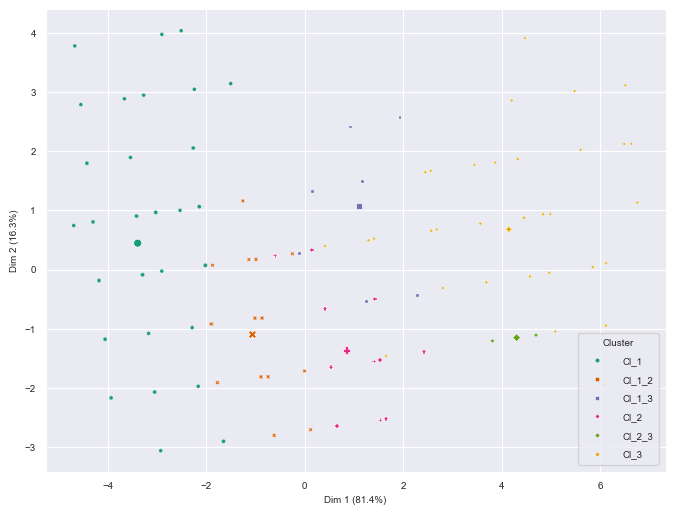

Weight matrix: 
 [[0.09006717 0.0197123  0.36818828 0.1848406  0.1844286  0.04087926
  0.1118838 ]
 [0.05902657 0.3506459  0.04331536 0.06467886 0.286325   0.084457
  0.11155131]
 [0.00445104 0.08046061 0.42816225 0.10614076 0.04019642 0.12253842
  0.21805051]]
Covariance Matrix 1: [1.43062579 0.26912137 0.         0.10271808 0.         2.58027813
 0.        ]
Covariance Matrix 2: [0.39047619 0.         0.         0.04761905 0.09047619 0.92857143
 0.04761905]
Covariance Matrix 3: [2.30368421 0.49175439 0.         0.11140351 0.18315789 1.59210526
 0.07719298]


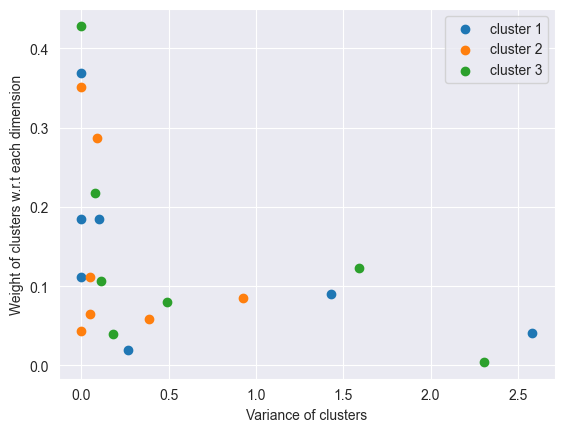

----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.5320208203313259 - J value: 1.9239465602842307
Maximum Non-specificity value: 3.067309392001461
Minimum Non-specificity value: 0.034725514764742345
Average Non-specificity value: 1.0161664230239913


In [7]:
# Feature weighted ECM clustering
c = 3
model = fwecm(x=X, c=c, beta=2, alpha=1, delta=100, ntrials=5, epsi=1e-4)

# ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

W = model['W']
print(f"Weight matrix: \n {W}")
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)
W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
W_COV_3.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker='o')
plt.scatter(W_COV_3['x'], W_COV_3['y'], label = "cluster 3", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)

#### <span style="color:red"> I have tried several times for Weight ECM and the highest ARI value I can get is around ~54.</span>

## Non-specificity equation
![test.png](assets/Non-specificity.png)